<a href="https://colab.research.google.com/github/shiftkey-labs/PythonDA-course/blob/main/Assessment/Data_Analytics_with_Python_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This assessment aims to evaluate your understanding and application of the concepts covered in the Data Analytics course. You will be tasked with analyzing a dataset related to remote work and mental health, utilizing various data manipulation, statistical analysis, and visualization techniques learned throughout the course. This exercise will help reinforce your skills in data handling, exploratory analysis, and drawing meaningful insights from data.

### Submission Details:

The deadline for submission is 16 November at 11:59 PM. Specific submission details will be shared with you shortly.

### Passing Criteria:

To successfully pass this assessment, you must achieve a score of 80% or higher.
We encourage you to engage with the material and demonstrate your analytical skills. Good luck!


---



# Section 1 - Beginner (25%)


## Shopping Cart System with Discounts

Write a Python program to simulate a shopping cart system for an online store. The program will calculate the total cost of items, apply discounts, and check if the total exceeds a specified budget.

1.	Variables and Lists:
  - Define a `budget` variable with an initial value of 200.
  
  - Create two empty lists called `item_names_list` and `item_prices_list` to store the name and price of each item separately.

In [34]:
# Write your code here
budget = 200
item_names_list = []
item_prices_list = []

In [35]:
# extra variables
DISCOUNT_THRESHOLD: int = 100
DISCOUNT_FACTOR: float = 0.9

2. Functions:
  - Write a function `add_item_to_cart(item_name, item_price)` that takes the item’s name and price as arguments, appends the name to item_names and the price to item_prices, and returns both updated lists.
  
  - Write a function `calculate_total(item_prices)` that calculates and returns the total cost of all items in item_prices.

    Conditions:
    - If the total cost exceeds the budget after adding an item, print "Budget exceeded!" and stop adding more items.
    - If the total cost is within budget and exceeds $100, apply a 10% discount on the total and print the discounted total.

In [36]:
# Write your code here
def add_item_to_cart(item_name, item_price):
    item_names_list.append(item_name)
    item_prices_list.append(item_price)
    return item_names_list, item_prices_list


def calculate_total(item_prices):
    return sum(item_prices)

In [37]:
# extra function(s) for convenience
def remove_last_item_from_cart():
    item_names_list.pop()
    item_prices_list.pop()

3.	Loop and Input:
  - Start the input only once the user says 'start'
  - Use a loop to allow the user to add items to the cart by entering an item name and price. The loop should stop when the user types 'done'.
  - For each item, add it to item_names and item_prices using add_item_to_cart, then update the total cost using calculate_total.

Output:
  - After the loop ends, display the final cart with each item and its price, the initial total, any applicable discount, and the final total.


In [38]:
# Write your code here
while input("Enter 'start' to start shopping: ") != "start":
    continue

initial_total = calculate_total(item_prices_list)

running_total = 0
while True:
    item = input("Enter item name: ")
    if item == "done":
        break
    price = input("Enter item price: ")
    if price == "done":
        break
    add_item_to_cart(item, float(price))
    running_total = calculate_total(item_prices_list)
    if running_total > budget:
        print("Budget exceeded!")

        # remove the item that caused overbudget
        remove_last_item_from_cart()

        # recalculate total without problematic item
        running_total = calculate_total(item_prices_list)

        break

if running_total > DISCOUNT_THRESHOLD:
    print("Wow, you get a discount!")
    running_total *= DISCOUNT_FACTOR

Budget exceeded!
Wow, you get a discount!


In [39]:
# Write your code here
print("item : price")
print("-" * 20)
for i, p in zip(item_names_list, item_prices_list):
    print(f"{i} : {p:0.2f}")
print("-" * 20)
print(f"initial total ($): {initial_total:0.2f}")
print(f"final total ($): {running_total:0.2f}")

item : price
--------------------
cat : 100.00
bat : 50.00
--------------------
initial total ($): 0.00
final total ($): 135.00


# Section 2 - Intermidiate (55%) - Remote Work and Mental Health Analysis

Dataset source: Kaggle (https://www.kaggle.com/datasets/waqi786/remote-work-and-mental-health)




## Objective:
- In the following sections, you will explore the "Remote Work and Mental Health" dataset using Python and different data science libraries such as Pandas, NumPy and Matplotlib.
- Follow the instructions below to complete each task. Please provide code for each question and any observations as comments when necessary.

In [26]:
# Import necessary modules and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Load Dataset (2 marks)
- Instructions: Load the dataset using Pandas and display few rows.
- Question: Describe the overall structure (rows, columns, data types) as a comment at the end of your code.


In [27]:
# Write code here
df = pd.read_csv("dataset.csv")

df.tail()

# df.info() # <- results from...
# ROWS: 5000
# COLS: 20
# TYPE: int64 (7 cols), object (13 cols)

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia
4999,EMP5000,29,Male,HR,IT,30,Onsite,20,15,1,Low,Depression,Yes,No Change,3,Unsatisfied,5,NaN,Poor,Asia


## 2. Display 'n' Rows (3 marks)
- Instructions: Display the first 13 rows of the dataset.

In [28]:
# Write code here
df.head(13)

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
5,EMP0006,59,Non-binary,Sales,IT,31,Hybrid,39,3,4,High,NaN,No,Increase,5,Unsatisfied,1,NaN,Average,South America
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia
7,EMP0008,42,Non-binary,Data Scientist,Manufacturing,6,Onsite,54,7,3,Medium,Depression,No,Decrease,5,Satisfied,4,NaN,Average,North America
8,EMP0009,56,Prefer not to say,Data Scientist,Healthcare,9,Hybrid,24,4,2,High,NaN,Yes,Decrease,2,Unsatisfied,4,Daily,Poor,Europe
9,EMP0010,30,Female,HR,IT,28,Hybrid,57,6,1,Low,Depression,Yes,Decrease,2,Neutral,1,Weekly,Poor,North America


- Instructions: Display the last 7 rows of the dataset

In [29]:
# Write code here
df.tail(7)

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
4993,EMP4994,35,Non-binary,Marketing,Retail,12,Hybrid,32,13,5,Medium,NaN,Yes,Decrease,2,Satisfied,3,Daily,Good,Asia
4994,EMP4995,40,Prefer not to say,Marketing,IT,17,Hybrid,52,1,2,Medium,Burnout,Yes,Increase,3,Neutral,5,Daily,Good,Oceania
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia
4999,EMP5000,29,Male,HR,IT,30,Onsite,20,15,1,Low,Depression,Yes,No Change,3,Unsatisfied,5,NaN,Poor,Asia


## 3. Find the Number of Null Values in the Dataset (2 mark)

In [30]:
# Write code here
df.isna().sum().sum()

np.int64(2825)

## 4. Statistical Summary for Numeric Columns (10 marks)
Instructions: Use individual commands to find the statistical summary.

- Count

In [31]:
# Write code here
df.count(numeric_only=True)

Age                                5000
Years_of_Experience                5000
Hours_Worked_Per_Week              5000
Number_of_Virtual_Meetings         5000
Work_Life_Balance_Rating           5000
Social_Isolation_Rating            5000
Company_Support_for_Remote_Work    5000
dtype: int64

- Mean

In [32]:
# Write code here
df.mean(numeric_only=True)

Age                                40.9950
Years_of_Experience                17.8102
Hours_Worked_Per_Week              39.6146
Number_of_Virtual_Meetings          7.5590
Work_Life_Balance_Rating            2.9842
Social_Isolation_Rating             2.9938
Company_Support_for_Remote_Work     3.0078
dtype: float64

- Standard Deviation

In [33]:
# Write code here
df.std(numeric_only=True)

Age                                11.296021
Years_of_Experience                10.020412
Hours_Worked_Per_Week              11.860194
Number_of_Virtual_Meetings          4.636121
Work_Life_Balance_Rating            1.410513
Social_Isolation_Rating             1.394615
Company_Support_for_Remote_Work     1.399046
dtype: float64

- Quartiles

In [34]:
# Write code here
df.quantile(q=[0.25, 0.5, 0.75], numeric_only=True)

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
0.25,31.0,9.0,29.0,4.0,2.0,2.0,2.0
0.50,41.0,18.0,40.0,8.0,3.0,3.0,3.0
0.75,51.0,26.0,50.0,12.0,4.0,4.0,4.0


## 5. Calculate Extrema (2 marks)

In [35]:
# Write code here
print("Minima:")
print("-" * 42)
print(df.min(numeric_only=True))
print("=" * 42)
print("Maxima:")
print("-" * 42)
print(df.max(numeric_only=True))

Minima:
------------------------------------------
Age                                22
Years_of_Experience                 1
Hours_Worked_Per_Week              20
Number_of_Virtual_Meetings          0
Work_Life_Balance_Rating            1
Social_Isolation_Rating             1
Company_Support_for_Remote_Work     1
dtype: int64
Maxima:
------------------------------------------
Age                                60
Years_of_Experience                35
Hours_Worked_Per_Week              60
Number_of_Virtual_Meetings         15
Work_Life_Balance_Rating            5
Social_Isolation_Rating             5
Company_Support_for_Remote_Work     5
dtype: int64


## 6. Find Unique Values in a Categorical Column (3 marks)

- Instructions: Identify the unique values in the `job_role` column (2 marks)
- Question: How many unique roles are represented in the dataset? (1 mark)

In [36]:
# Write code here
unique_roles = df.Job_Role.unique()
print("Roles:")
print("-" * 42)
print(*unique_roles, sep="\n")
print("=" * 42)
print(f"There are {len(unique_roles)} unique roles in the dataset.")

Roles:
------------------------------------------
HR
Data Scientist
Software Engineer
Sales
Marketing
Designer
Project Manager
There are 7 unique roles in the dataset.


## 7. Group Data and Calculate Mean (4 marks)
- Instructions: Group the dataset by `job_role` and calculate the mean of the `Work_Life_Balance_Rating` for each role.
- Question: Which job role has the highest average Work life balance?

In [37]:
# Write code here
df.groupby("Job_Role").mean(numeric_only=True)["Work_Life_Balance_Rating"].sort_values(ascending=False)

Job_Role
Sales                3.043656
Software Engineer    3.033755
Data Scientist       3.007184
Designer             2.966805
Project Manager      2.960705
Marketing            2.945827
HR                   2.930168
Name: Work_Life_Balance_Rating, dtype: float64

## 8. Filter Data Based on Condition (4 marks)
- Instructions: Filter the dataset to show only rows where `work_hours_per_week` is greater than 40.
- Question: How many employees are working overtime?

In [38]:
# Write code here
df[df["Hours_Worked_Per_Week"] > 40]

# 2384 employees are working overtime

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia
7,EMP0008,42,Non-binary,Data Scientist,Manufacturing,6,Onsite,54,7,3,Medium,Depression,No,Decrease,5,Satisfied,4,NaN,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,EMP4992,60,Female,Data Scientist,IT,9,Hybrid,57,4,2,Low,Burnout,Yes,Increase,4,Satisfied,5,Weekly,Average,Oceania
4992,EMP4993,55,Prefer not to say,Project Manager,Consulting,21,Hybrid,45,7,2,High,Anxiety,No,No Change,2,Satisfied,3,Daily,Poor,Africa
4994,EMP4995,40,Prefer not to say,Marketing,IT,17,Hybrid,52,1,2,Medium,Burnout,Yes,Increase,3,Neutral,5,Daily,Good,Oceania
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa


## 9 . Histogram of Work Hours per Week (5 marks)
- Instructions: Create a histogram of `Hours_Worked_Per_Week` (4 marks).
- Question: Describe the distribution of work hours. Are most employees working around a certain number of hours per week? (1 mark)

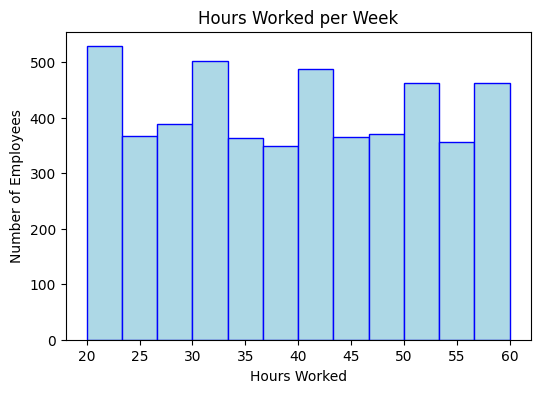

In [39]:
# Write code here
plt.figure(figsize=(6, 4))
plt.hist(df["Hours_Worked_Per_Week"], bins=12, color="lightblue", edgecolor="blue")
plt.title("Hours Worked per Week")
plt.xlabel("Hours Worked")
plt.ylabel("Number of Employees")
plt.show()

# The histogram is mostly symmetric, so there's no indication that most employees work a specific number of hours per week.

## 10. Scatter Plot of Work Hours vs. Years_of_Experience (4 marks)
- Instructions: Create a scatter plot with `Hours_Worked_Per_Week` on the x-axis and `Years_of_Experience` on the y-axis.

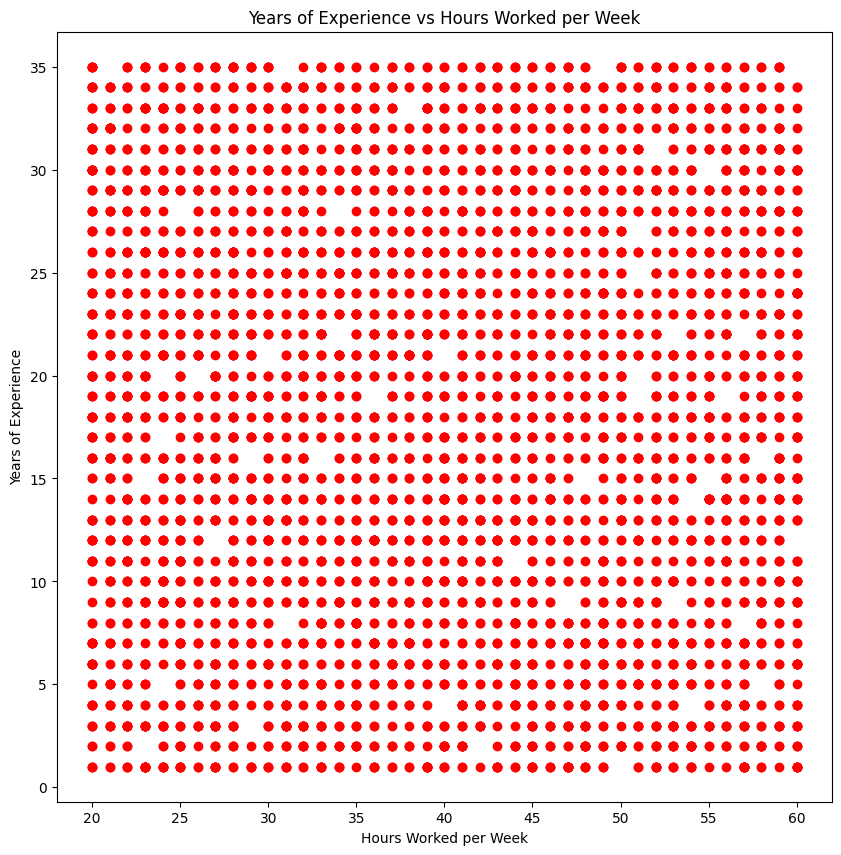

In [40]:
# Write code here
plt.figure(figsize=(10, 10))
plt.scatter(df["Hours_Worked_Per_Week"], df["Years_of_Experience"], color="red")
plt.title("Years of Experience vs Hours Worked per Week")
plt.xlabel("Hours Worked per Week")
plt.ylabel("Years of Experience")
plt.show()

## 11. Bar Chart of Average Work Life Balance by Job Role (5 marks)
- Instructions: Create a bar chart showing the average `Work_Life_Balance_Rating` for each `Job_Role` (4 marks).
- Question: Which job roles have the highest and lowest average mental Work Life Balance? (1 mark)

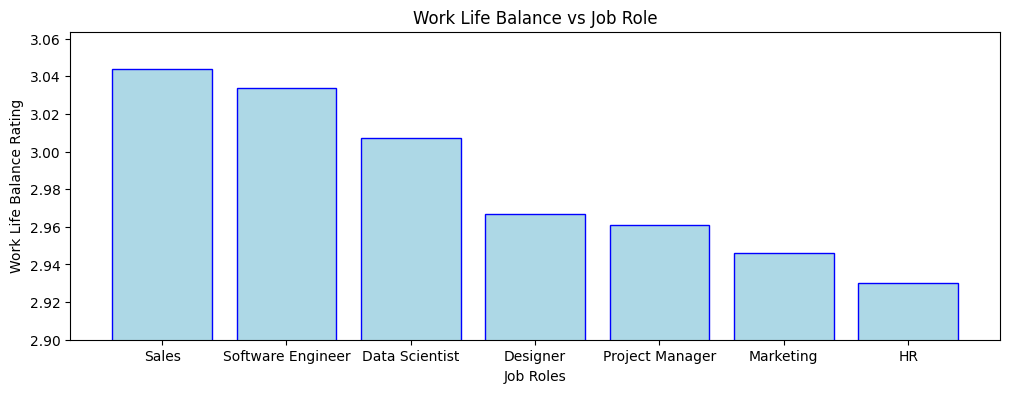

In [41]:
# Write code here
wlb_rating_by_role = df.groupby("Job_Role").mean(numeric_only=True)["Work_Life_Balance_Rating"].sort_values(ascending=False)
roles = wlb_rating_by_role.index
ratings = wlb_rating_by_role.values

plt.figure(figsize=(12, 4))
plt.bar(roles, ratings, color="lightblue", edgecolor="blue")
plt.ylim(2.9, ratings.max() + 0.02)
plt.title("Work Life Balance vs Job Role")
plt.xlabel("Job Roles")
plt.ylabel("Work Life Balance Rating")
plt.show()

# job with highest work-life balance rating: Sales
# job with lowest work-life balance rating: HR

## 12. Pie Chart of Workload Level Distribution (5 marks)
- Instructions: Use a pie chart to show the proportion of `Access_to_Mental_Health_Resources` (Yes and no) in the dataset (4 marks).
- Question: What percentage of employees have access to mental health resources? (1 mark)

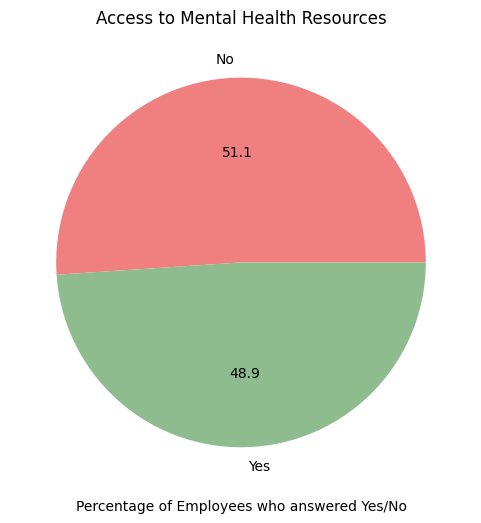

In [42]:
# Write code here
mental_health_access = df.groupby("Access_to_Mental_Health_Resources")["Access_to_Mental_Health_Resources"].count()

plt.figure(figsize=(6, 6))
plt.title("Access to Mental Health Resources")
plt.xlabel("Percentage of Employees who answered Yes/No")
plt.pie(mental_health_access.values, labels=mental_health_access.index, autopct="%.1f", colors=("lightcoral", "darkseagreen"))
plt.show()

# About 48.9% of employees have access to mental health resources.

## 13. Scatter Plot of Age vs. Social Isolation Rating (6 marks)
- Instructions: Create a scatter plot with `age` on the x-axis and `Social_Isolation_Rating` on the y-axis (4 marks).
- Question: Do you observe any trends or relationships between age and social isolation? Is there a noticeable impact of age on isoloation? (2 marks)

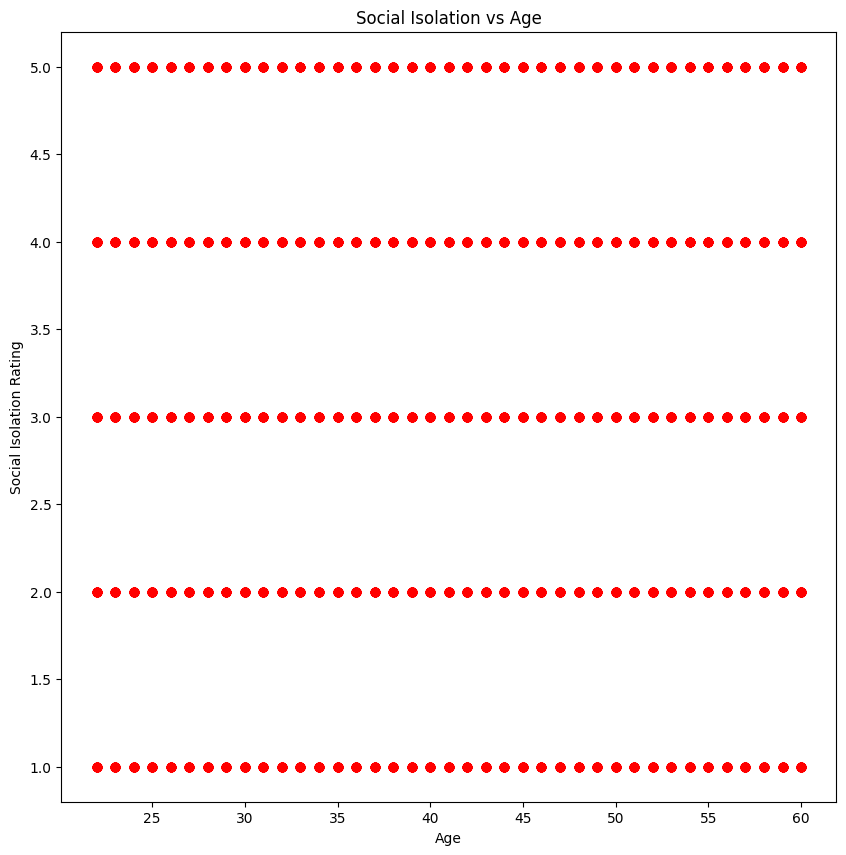

In [43]:
# Write code here
plt.figure(figsize=(10, 10))
plt.scatter(df["Age"], df["Social_Isolation_Rating"], color="red")
plt.title("Social Isolation vs Age")
plt.xlabel("Age")
plt.ylabel("Social Isolation Rating")
plt.show()

# There's no relationship between age and social isolation. People of any age can have any level of social isolation. Age does not seem to impact social isolation.

# Section 3 - Long Answer/Advanced (20%)



## Job Role and Workload Level Impact on Mental Health

Instructions: Investigate the influence of job roles and workload level on the mental health.
- Create a new column `workload_level` that labels each entry as "High" if the `Hours_Worked_Per_Week` is above its mean, otherwise "Low." (5 marks)
- Group the dataset by `Industry` and calculate the average `Hours_Worked_Per_Week` for each combination. (5 marks)
- Use a bar chart to display the average `Stress_Level` for each job role, with separate bars for high and low stress levels. (5 marks)
- Analyze the results: Which job roles and workload levels appear to have the greatest impact on mental health? (5 marks)


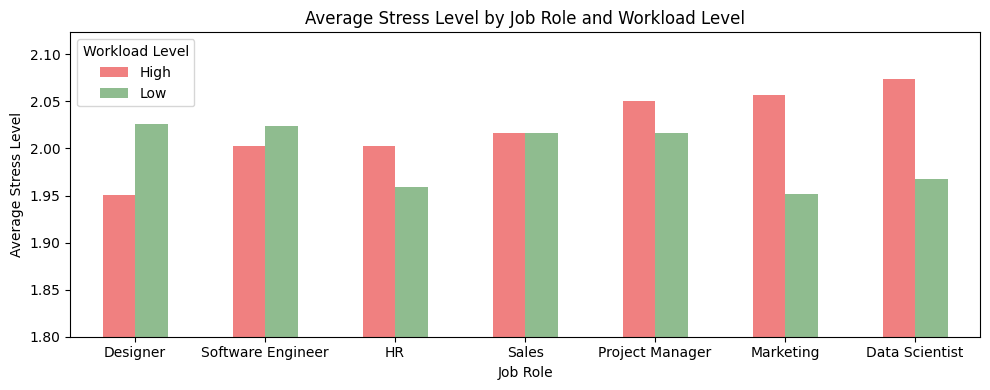

In [44]:
# Write code here
df["workload_level"] = np.where(df["Hours_Worked_Per_Week"] > df["Hours_Worked_Per_Week"].mean(), "High", "Low")

industry_work_hours = df.groupby("Industry")["Hours_Worked_Per_Week"].mean().sort_values()

stress_mapping = {"Low": 1, "Medium": 2, "High": 3}
job_role_stress_avg = df.groupby(["Job_Role", "workload_level"])["Stress_Level"].apply(lambda x: x.map(stress_mapping).mean()).unstack().sort_values(by="High")
job_role_stress_avg.plot(kind="bar", figsize=(10, 4), color=["lightcoral", "darkseagreen"])
plt.ylim(1.8, job_role_stress_avg.values.max() + 0.05)
plt.title("Average Stress Level by Job Role and Workload Level")
plt.xlabel("Job Role")
plt.ylabel("Average Stress Level")
plt.xticks(rotation=0)
plt.legend(title="Workload Level")
plt.tight_layout()
plt.show()

### Analysis

From the graph we can see:
- Data Scientists with High Workload Levels have the highest Stress Levels on average
- Marketing employees with Low Workload Levels have the lowest Stress Levels on average

That being said...
- Data Scientists with Low Workload Levels have one of the lowest Stress Levels on average
- Marketing employees with High Workload Levels have one of the highest Stress Levels on average

So if you're a Data Analyst or Marketer, make sure your Workload Levels are Low, otherwise you might suffer from high Stress Levels. For other Job Roles, the impact of Workload Levels on average Stress Level isn't as drastic; for Sales, Workload Level seems to have no impact (or negligible) on the average Stress Level.

---

#### Extras

Interesting to note:
- Designers and Software Engineers seem to have an inverted relation between Workload Levels and Stress
- for Low Workload Levels, the average Stress Levels are higher, and the opposite is true for High Workload Levels
- this is more apparent for Designers

Next Steps:
- would be interesting to compare the average salary for each Role + Workload Level combination
- then we could make more inferences on how "worthwhile" pursuing a career in each role may be
- if it's high stress and high workload but the pay isn't great, maybe it's time for a career change...